<div class="alert alert-block alert-danger">
    
### Notes

</div>

###  Interactions baby, Numerical python, $ \ldots $.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
np.random.seed(1234)

In [5]:
data = pd.read_csv('dep.txt', sep='\t')
data.head()

,y,age,x2,x3,TRT
0,56,21,1,0,A
1,41,23,0,1,B
2,40,30,0,1,B
3,28,19,0,0,C
4,55,28,1,0,A


***

In [6]:
linreg = smf.ols('y ~ age + x2 + x3', data=data)
linreg_result = linreg.fit()
linreg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     38.71
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           9.29e-11
Time:                        01:51:52   Log-Likelihood:                -113.68
No. Observations:                  36   AIC:                             235.4
Df Residuals:                      32   BIC:                             241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2906      3.505      6.359      0.000      15.151      29.430
age            0.6645      0.070      9.522      0.000       0.522       0.807
x2            10.2528      2.465      4.159      0.000       5.231      15.275
x3             0.4452      2.464      0.181      0.858      -4.574       5.464
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.196
Skew:                          -0.347   Prob(JB):                        0.550
Kurtosis:                       2.438   Cond. No.                         179.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

In [7]:
linreg_inter = smf.ols('y ~ age + x2 + x3 + age*x2 + age*x3', data=data)
linreg_inter_result = linreg_inter.fit()
linreg_inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           4.26e-15
Time:                        01:51:52   Log-Likelihood:                -97.024
No. Observations:                  36   AIC:                             206.0
Df Residuals:                      30   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2114      3.350      1.854      0.074      -0.630      13.052
age            1.0334      0.072     14.288      0.000       0.886       1.181
x2            41.3042      5.085      8.124      0.000      30.920      51.688
x3            22.7068      5.091      4.460      0.000      12.310      33.104
age:x2        -0.7029      0.109     -6.451      0.000      -0.925      -0.480
age:x3        -0.5097      0.110     -4.617      0.000      -0.735      -0.284
==============================================================================
Omnibus:                        2.593   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.475
Skew:                          -0.183   Prob(JB):                        0.478
Kurtosis:                       2.079   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

##### General Linear F-Test.

$H_0 :$ Reduced model.

$H_A :$ Full model.

In [11]:
sm.stats.anova_lm(linreg_result, linreg_inter_result)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,32.0,1165.574712,0.0,NaN,NaN,NaN
1,30.0,462.147738,2.0,703.426973,22.831237,9.410457e-07


***

In [9]:
data['TRT_encoded'] = data.loc[:,'TRT'].astype("category").cat.codes
data.head()

,y,age,x2,x3,TRT,TRT_encoded
0,56,21,1,0,A,0
1,41,23,0,1,B,1
2,40,30,0,1,B,1
3,28,19,0,0,C,2
4,55,28,1,0,A,0


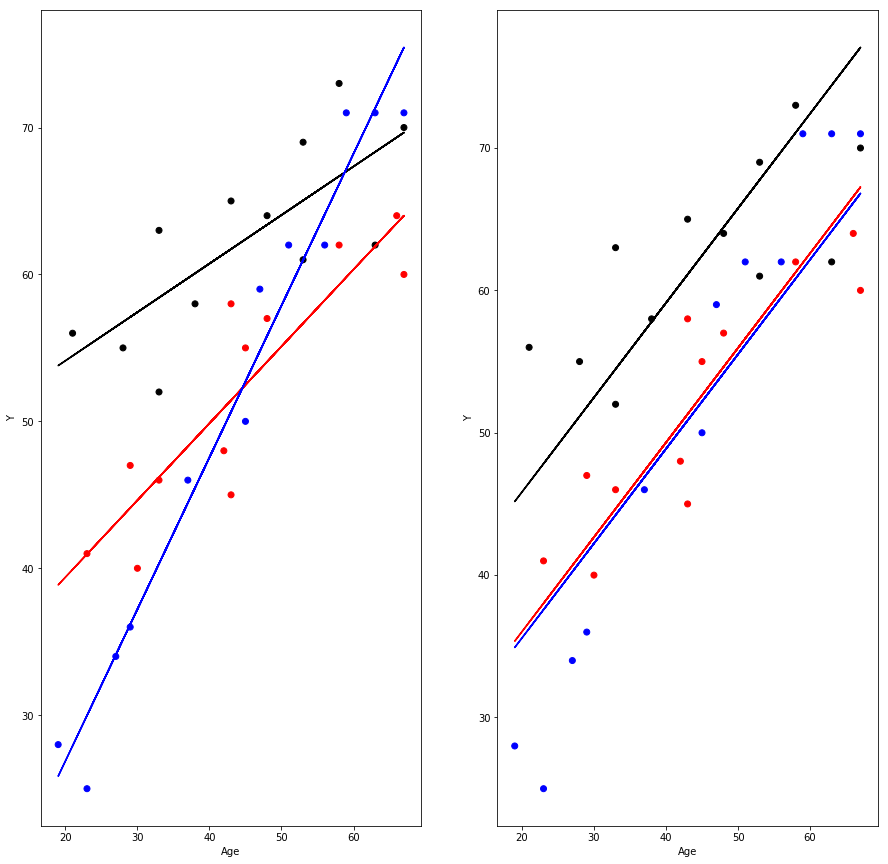

In [10]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
colors = np.array(['black', 'red', 'blue'])
plt.scatter(data.loc[:,'age'], data.loc[:,'y'], c=colors[data['TRT_encoded']])
plt.xlabel('Age'), plt.ylabel('Y')

plt.plot(data.loc[:,'age'], linreg_inter_result.params[0] + linreg_inter_result.params[1]*data['age'] + linreg_inter_result.params[2] + linreg_inter_result.params[4]*data['age'], color=colors[0])
plt.plot(data.loc[:,'age'], linreg_inter_result.params[0] + linreg_inter_result.params[1]*data['age'] + linreg_inter_result.params[3] + linreg_inter_result.params[5]*data['age'], color=colors[1])
plt.plot(data.loc[:,'age'], linreg_inter_result.params[0] + linreg_inter_result.params[1]*data['age'], color=colors[2]);

plt.subplot(1,2,2)
colors = np.array(['black', 'red', 'blue'])
plt.scatter(data.loc[:,'age'], data.loc[:,'y'], c=colors[data['TRT_encoded']])
plt.xlabel('Age'), plt.ylabel('Y')

plt.plot(data.loc[:,'age'], linreg_result.params[0] + linreg_result.params[1]*data['age'] + linreg_result.params[2], color=colors[0])
plt.plot(data.loc[:,'age'], linreg_result.params[0] + linreg_result.params[1]*data['age'] + linreg_result.params[3], color=colors[1])
plt.plot(data.loc[:,'age'], linreg_result.params[0] + linreg_result.params[1]*data['age'], color=colors[2]);